In [1]:
%load_ext autoreload
%autoreload 2
%run ./initializer

Added the path (/Users/rik/Documents/VU/DMT/DataMiningTechniquesA1) to sys.path


In [2]:
from random_forest_classifier_2a import RandomForestMoodModel, plot_predicted_vs_actual
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from data_loading import DataPreprocessor

In [3]:
data_loader = DataPreprocessor()
train_df, test_df = data_loader.load_and_preprocess_data("1d", 0.5, 1, for_RNN_model=False)

Removed 56 outliers from 1268 observations. Percentage: 4.42%


In [4]:
# 1. Prepare features and labels, filtering rare classes
label_counts = train_df['mood'].value_counts()
valid_labels = label_counts[label_counts >= 2].index
train_df_filtered = train_df[train_df['mood'].isin(valid_labels)]

# Keep date column for evaluation
dates = train_df_filtered['date']

# Then drop id, mood, and date for features
features = train_df_filtered.drop(columns=['id', 'mood', 'date'])
labels = train_df_filtered['mood']

# Train-validation split
X_train, X_val, y_train, y_val, dates_train, dates_val = train_test_split(
    features, labels, dates, test_size=0.2, stratify=labels, random_state=42
)

# 3. Train the classifier with class weights
model = RandomForestMoodModel(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# 4. Evaluate on validation set
val_preds = model.predict(X_val)
print("\nValidation Report:")
print(classification_report(y_val, val_preds))

# 5. Predict on test set
X_test = test_df.drop(columns=['id', 'mood', 'date'])
test_preds = model.predict(X_test)

# 6. Attach predictions
test_df_with_preds = test_df.copy()
test_df_with_preds['predicted_mood_class'] = test_preds

# 7. Output predictions
print(test_df_with_preds[['id', 'predicted_mood_class']])


Validation Report:
              precision    recall  f1-score   support

           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         6
          12       0.75      0.11      0.19        27
          13       0.25      0.06      0.10        34
          14       0.40      0.90      0.56        92
          15       0.20      0.05      0.08        39
          16       0.36      0.15      0.21        34
          17       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         1

    accuracy                           0.39       242
   macro avg       0.16      0.11      0.09       242
weighted avg       0.35      0.39      0.29       242

         id  predicted_mood_class
0   AS14.01                    14
1   AS14.02                    14
2   AS14.03

/Users/rik/Documents/VU/DMT/DataMiningTechniquesA1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rik/Documents/VU/DMT/DataMiningTechniquesA1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rik/Documents/VU/DMT/DataMiningTechniquesA1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Daily average RMSE: 1.060490722058682
Mean Error: -0.1624036281179138


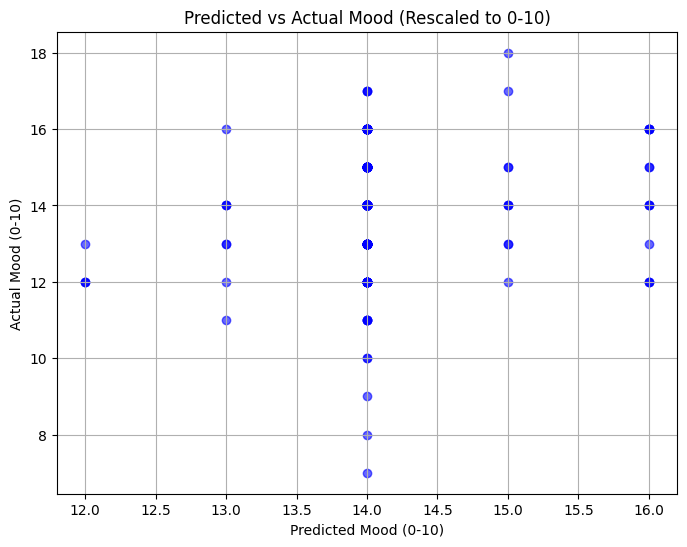

In [5]:
rmse, mean_error = model.evaluate_daily_average_performance(y_val, val_preds, dates_val)
print("Daily average RMSE:", rmse)
print("Mean Error:", mean_error)

plot_predicted_vs_actual(y_val, val_preds)